Dataset : KC1
Feaatures = 22
Model : GAN
Balancing technique : Generate Values


In [ ]:
import pandas as pd
import tensorflow as tf

df = pd.read_csv("kc1.csv")


In [ ]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.00000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,20.372262,2.838028,1.674443,2.546420,49.829445,258.696719,0.319583,6.771242,21.240071,5242.386240,...,291.24504,14.525367,0.945946,1.759602,0.132764,7.631674,9.537316,31.043717,18.786724,4.665908
std,29.754442,3.900763,2.200659,3.375859,83.599874,516.317605,0.317029,7.863646,21.500367,17444.981211,...,969.16516,24.188302,3.085271,3.856850,0.704023,5.730347,12.195727,51.776056,32.074398,7.792206
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,0.080000,1.500000,5.330000,12.000000,...,0.67000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000
50%,9.000000,1.000000,1.000000,1.000000,16.000000,57.060000,0.200000,3.500000,14.400000,213.970000,...,11.89000,5.000000,0.000000,0.000000,0.000000,6.000000,5.000000,10.000000,6.000000,1.000000
75%,24.000000,3.000000,1.000000,3.000000,58.000000,265.930000,0.670000,9.200000,29.850000,2276.020000,...,126.45000,17.000000,0.000000,2.000000,0.000000,11.000000,13.000000,36.000000,22.000000,5.000000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,18044.64000,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000


In [ ]:
df.shape

(2109, 22)

In [ ]:
df.corr().defects

loc                  0.348405
v(g)                 0.295570
ev(g)                0.205159
iv(g)                0.295694
n                    0.355101
v                    0.339539
l                   -0.232877
d                    0.387493
i                    0.342854
e                    0.270070
b                    0.339028
t                    0.270071
lOCode               0.341529
lOComment            0.232866
lOBlank              0.323620
locCodeAndComment    0.005067
uniq_Op              0.385566
uniq_Opnd            0.386714
total_Op             0.348785
total_Opnd           0.362549
branchCount          0.297827
defects              1.000000
Name: defects, dtype: float64

In [ ]:
cols = ["loc","uniq_Op","d","uniq_Opnd","total_Opnd","total_Op"]

In [ ]:
df.defects.value_counts()

False    1783
True      326
Name: defects, dtype: int64

In [ ]:
df_t = df[df["defects"] == True]

In [ ]:
dim = df_t.shape[1]

In [ ]:
df_t.shape

(326, 22)

In [ ]:
df_t = df_t[cols]

In [ ]:
cols

['loc', 'uniq_Op', 'd', 'uniq_Opnd', 'total_Opnd', 'total_Op']

In [ ]:
df_t

,loc,uniq_Op,d,uniq_Opnd,total_Opnd,total_Op
1,1.0,1.0,1.00,1.0,1.0,1.0
2,83.0,18.0,23.04,25.0,64.0,107.0
3,46.0,16.0,14.86,28.0,52.0,89.0
4,25.0,11.0,9.35,10.0,17.0,41.0
5,43.0,11.0,11.27,20.0,41.0,74.0
...,...,...,...,...,...,...
322,98.0,23.0,31.25,46.0,125.0,182.0
323,119.0,26.0,31.20,35.0,84.0,136.0
324,35.0,15.0,21.25,12.0,34.0,54.0
325,116.0,18.0,18.00,70.0,140.0,242.0


Streaming output truncated to the last 5000 lines.
Shape of generated data: (128, 6)
Epoch 1334/3000 [D loss: 0.5339548885822296, G loss: 0.7364016771316528]
4/4 [==============================] - 0s 4ms/step
Shape of generated data: (128, 6)
Epoch 1335/3000 [D loss: 0.5343693792819977, G loss: 0.73589688539505]
4/4 [==============================] - 0s 3ms/step
Shape of generated data: (128, 6)
Epoch 1336/3000 [D loss: 0.5435675382614136, G loss: 0.732835054397583]
4/4 [==============================] - 0s 3ms/step
Shape of generated data: (128, 6)
Epoch 1337/3000 [D loss: 0.5372890383005142, G loss: 0.7295438051223755]
4/4 [==============================] - 0s 3ms/step
Shape of generated data: (128, 6)
Epoch 1338/3000 [D loss: 0.5496130287647247, G loss: 0.7296358942985535]
4/4 [==============================] - 0s 3ms/step
Shape of generated data: (128, 6)
Epoch 1339/3000 [D loss: 0.5424486696720123, G loss: 0.7321942448616028]
4/4 [==============================] - 0s 3ms/step
Shap

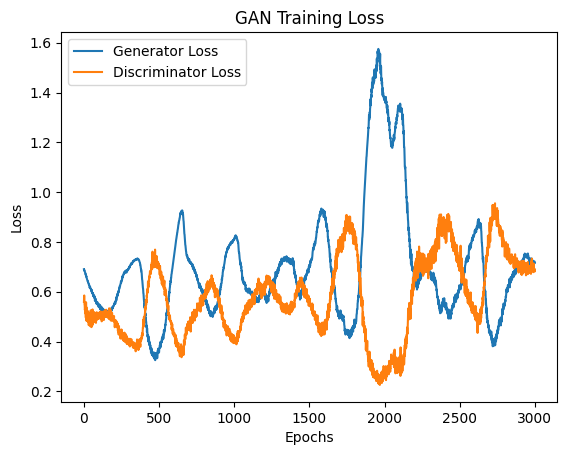

In [ ]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import matplotlib.pyplot as plt

gen = None

# Custom loss function
def custom_loss(y_true, y_pred):
    return K.mean(K.round(K.maximum(y_pred, 1.0)) - y_true)

# Define generator model
def build_generator(dim):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation='relu'))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(6, activation='linear'))
    return model

# Define discriminator model
def build_discriminator(dim):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build GAN model
def build_gan(generator, discriminator, gen_optimizer, disc_optimizer):
    discriminator.trainable = False
    gan_input = generator.input
    gan_output = discriminator(generator.output)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer=gen_optimizer, loss='binary_crossentropy')
    discriminator.trainable = True
    discriminator.compile(optimizer=disc_optimizer, loss='binary_crossentropy')
    return gan

# Train GAN function
# Train GAN function
def train_gan(generator, discriminator, gan, X_train, epochs=3000, batch_size=128):
    g_losses = []
    d_losses = []
    lowest_accuracy = float('inf')  # Initialize with infinity
    best_gan = None  # Initialize with None
    for epoch in range(epochs):
        # Generate fake data
        noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))
        fake_data = generator.predict(noise)

        # Print the shape of generated data
        print("Shape of generated data:", fake_data.shape)

        # Select a random batch of real data
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]

        # Labels for fake and real data
        fake_labels = np.zeros((batch_size, 1))
        real_labels = np.ones((batch_size, 1))

        # Train discriminator
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)

        # Compute discriminator loss
        d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

        # Generate noise for generator input
        noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))

        # Train generator using custom loss
        g_loss = gan.train_on_batch(noise, real_labels)

        # Append losses
        g_losses.append(g_loss)
        d_losses.append(d_loss)

        # Check if current accuracy is the lowest
        current_accuracy = min(d_loss_fake, d_loss_real)
        if current_accuracy < lowest_accuracy:
            lowest_accuracy = current_accuracy
            # Save the GAN model
            best_gan = generator

        # Print progress
        print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss}, G loss: {g_loss}]")

    # Plot losses
    plt.plot(range(1, epochs+1), g_losses, label='Generator Loss')
    plt.plot(range(1, epochs+1), d_losses, label='Discriminator Loss')
    plt.title('GAN Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return best_gan

# Assuming df is your data
X_train = df_t.values

# Build generator and discriminator models
generator = build_generator(6)
discriminator = build_discriminator(6)

# Define optimizers with different learning rates
gen_optimizer = Adam(learning_rate=0.0001, beta_1=0.5)
disc_optimizer = Adam(learning_rate=0.00005, beta_1=0.5)

# Build GAN model
gan = build_gan(generator, discriminator, gen_optimizer, disc_optimizer)

# Train GAN model and get the one with lowest accuracy
best_gan_model = train_gan(generator, discriminator, gan, X_train)




In [ ]:
import pandas as pd

# Check if the best GAN model is available
if best_gan_model is not None:
    num_outputs = 1783-326  # Change this to the desired number of outputs

    # Generate noise
    noise = np.random.normal(0, 1, size=(num_outputs, 6))

    # Generate data using the GAN model
    generated_data = best_gan_model.predict(noise)

    # Print the shape of the generated data
    print("Shape of generated data:", generated_data.shape)

    # Convert generated data into a DataFrame
    generated_df = pd.DataFrame(generated_data, columns=cols)

    # Display the generated data as a table
    print(generated_df)
else:
    print("No best GAN model found.")


46/46 [==============================] - 0s 1ms/step
Shape of generated data: (1457, 6)
            loc   uniq_Op          d  uniq_Opnd  total_Opnd   total_Op
0     23.388567  4.075613   5.815645  10.578368   20.328894  35.127548
1     40.812244  6.239160   9.292591  17.710409   34.600334  58.088665
2     39.332035  6.479876  10.251290  17.081488   31.907875  55.131500
3     56.712570  9.047136  14.425912  24.761980   47.753788  82.369888
4     36.528011  6.368241   8.877940  16.509203   31.584118  54.409382
...         ...       ...        ...        ...         ...        ...
1452  40.052311  6.464870   9.885666  17.708862   32.266678  55.853161
1453  33.904751  5.964806   8.465516  15.317218   28.245584  48.887363
1454  28.347334  4.981574   7.528844  12.443465   23.260649  40.544209
1455  48.277744  7.054636  11.527597  20.594536   41.001865  69.330254
1456  27.294622  4.135856   6.061539  12.129973   23.797560  40.426830

[1457 rows x 6 columns]


In [ ]:
cols.append("defects")

In [ ]:
cols

['loc', 'uniq_Op', 'd', 'uniq_Opnd', 'total_Opnd', 'total_Op', 'defects']

In [ ]:
df = df[cols]

In [ ]:
df

,loc,uniq_Op,d,uniq_Opnd,total_Opnd,total_Op,defects
0,1.1,1.2,1.30,1.2,1.2,1.2,0
1,1.0,1.0,1.00,1.0,1.0,1.0,1
2,83.0,18.0,23.04,25.0,64.0,107.0,1
3,46.0,16.0,14.86,28.0,52.0,89.0,1
4,25.0,11.0,9.35,10.0,17.0,41.0,1
...,...,...,...,...,...,...,...
2104,19.0,10.0,6.82,11.0,15.0,25.0,0
2105,23.0,12.0,9.69,13.0,21.0,39.0,0
2106,2.0,3.0,1.50,1.0,1.0,3.0,0
2107,13.0,6.0,4.00,6.0,8.0,9.0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.defects = label_encoder.fit_transform(df.defects)

In [ ]:
df.defects.value_counts()

0    1783
1     326
Name: defects, dtype: int64

In [ ]:
generated_df["defects"] = 1

In [ ]:
generated_df.describe()

,loc,uniq_Op,d,uniq_Opnd,total_Opnd,total_Op,defects
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.0
mean,36.759350,5.998728,8.887812,16.227346,30.903208,52.988804,1.0
std,7.758085,1.287245,1.912873,3.418588,6.887118,11.599698,0.0
min,19.499292,3.100310,4.655376,8.459245,15.501664,26.919287,1.0
25%,31.131937,5.032156,7.482023,13.722438,25.906157,44.581745,1.0
50%,35.926823,5.889687,8.664167,15.930068,30.090012,51.774921,1.0
75%,41.519264,6.792652,10.095215,18.232767,34.872158,59.812428,1.0
max,65.452850,10.617797,15.750267,28.357740,58.542362,98.373154,1.0


In [ ]:
import seaborn as sns

# Assuming 'generated_df' is your DataFrame
sns.boxplot(data=generated_df)

In [ ]:
df.describe()

,loc,uniq_Op,d,uniq_Opnd,total_Opnd,total_Op,defects
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,20.372262,7.631674,6.771242,9.537316,18.786724,31.043717,0.154576
std,29.754442,5.730347,7.863646,12.195727,32.074398,51.776056,0.361585
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,1.500000,1.000000,1.000000,3.000000,0.000000
50%,9.000000,6.000000,3.500000,5.000000,6.000000,10.000000,0.000000
75%,24.000000,11.000000,9.200000,13.000000,22.000000,36.000000,0.000000
max,288.000000,37.000000,53.750000,120.000000,428.000000,678.000000,1.000000


In [ ]:
df_gan = pd.concat([df,generated_df])

In [ ]:
df_gan.defects.value_counts()

0    1783
1    1783
Name: defects, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'defects' is the target column and the rest are features
X = df_gan.drop('defects', axis=1)
y = df_gan['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)


Random Forest Accuracy: 0.8949579831932774
Logistic Regression Accuracy: 0.8949579831932774


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Train Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train k-Nearest Neighbors (kNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions
svm_predictions = svm_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("k-Nearest Neighbors (kNN) Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Support Vector Machine (SVM) Accuracy: 0.8851540616246498
Gradient Boosting Accuracy: 0.8837535014005602
k-Nearest Neighbors (kNN) Accuracy: 0.8865546218487395
Decision Tree Accuracy: 0.8711484593837535
Naive Bayes Accuracy: 0.834733893557423


In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv("kc1.csv")

In [ ]:
X_train = df[cols]
y_train = df["defects"]

In [ ]:
X_train

,loc,uniq_Op,d,uniq_Opnd,total_Opnd,total_Op
0,1.1,1.2,1.30,1.2,1.2,1.2
1,1.0,1.0,1.00,1.0,1.0,1.0
2,83.0,18.0,23.04,25.0,64.0,107.0
3,46.0,16.0,14.86,28.0,52.0,89.0
4,25.0,11.0,9.35,10.0,17.0,41.0
...,...,...,...,...,...,...
2104,19.0,10.0,6.82,11.0,15.0,25.0
2105,23.0,12.0,9.69,13.0,21.0,39.0
2106,2.0,3.0,1.50,1.0,1.0,3.0
2107,13.0,6.0,4.00,6.0,8.0,9.0


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

<Axes: >

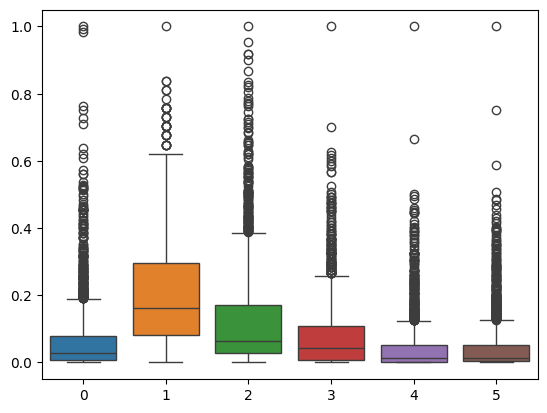

In [ ]:
import seaborn as sns

# Assuming 'generated_df' is your DataFrame
sns.boxplot(data=X_train_scaled)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your original training data
# Assuming cols is a list containing column names for your features

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Convert the resampled data into a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=cols)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['defects'])

# Concatenate features and target into one DataFrame
df_smote = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Display the resampled DataFrame
print(df_smote)


           loc   uniq_Op         d  uniq_Opnd  total_Opnd  total_Op  defects
0     0.000348  0.032432  0.024186   0.010000    0.002804  0.001770    False
1     0.000000  0.027027  0.018605   0.008333    0.002336  0.001475     True
2     0.285714  0.486486  0.428651   0.208333    0.149533  0.157817     True
3     0.156794  0.432432  0.276465   0.233333    0.121495  0.131268     True
4     0.083624  0.297297  0.173953   0.083333    0.039720  0.060472     True
...        ...       ...       ...        ...         ...       ...      ...
3561  0.057794  0.251174  0.140330   0.058333    0.026666  0.032016     True
3562  0.042226  0.162162  0.056693   0.081262    0.023074  0.018432     True
3563  0.269042  0.623541  0.545564   0.356542    0.254171  0.248945     True
3564  0.548416  0.716980  0.763509   0.391832    0.337247  0.376944     True
3565  0.275483  0.594595  0.534210   0.341269    0.249740  0.246008     True

[3566 rows x 7 columns]


In [ ]:
# Rename the DataFrame to df_smote
df_smote.columns = ["loc", "uniq_Op", "d", "uniq_Opnd", "total_Opnd", "total_Op", "defects"]

# Display the resulting DataFrame
print(df_smote)


           loc   uniq_Op         d  uniq_Opnd  total_Opnd  total_Op  defects
0     0.000348  0.032432  0.024186   0.010000    0.002804  0.001770    False
1     0.000000  0.027027  0.018605   0.008333    0.002336  0.001475     True
2     0.285714  0.486486  0.428651   0.208333    0.149533  0.157817     True
3     0.156794  0.432432  0.276465   0.233333    0.121495  0.131268     True
4     0.083624  0.297297  0.173953   0.083333    0.039720  0.060472     True
...        ...       ...       ...        ...         ...       ...      ...
3561  0.057794  0.251174  0.140330   0.058333    0.026666  0.032016     True
3562  0.042226  0.162162  0.056693   0.081262    0.023074  0.018432     True
3563  0.269042  0.623541  0.545564   0.356542    0.254171  0.248945     True
3564  0.548416  0.716980  0.763509   0.391832    0.337247  0.376944     True
3565  0.275483  0.594595  0.534210   0.341269    0.249740  0.246008     True

[3566 rows x 7 columns]


In [ ]:
df_smote.describe()

,loc,uniq_Op,d,uniq_Opnd,total_Opnd,total_Op,defects
count,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3566.00000
mean,0.098494,0.260627,0.176264,0.113639,0.067357,0.068685,0.50000
std,0.129787,0.175889,0.175518,0.122105,0.093289,0.093883,0.50007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.013937,0.108108,0.046512,0.016667,0.007009,0.007375,0.00000
50%,0.052265,0.216216,0.117071,0.072602,0.028629,0.030973,0.50000
75%,0.130551,0.351351,0.258205,0.166667,0.088748,0.090566,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

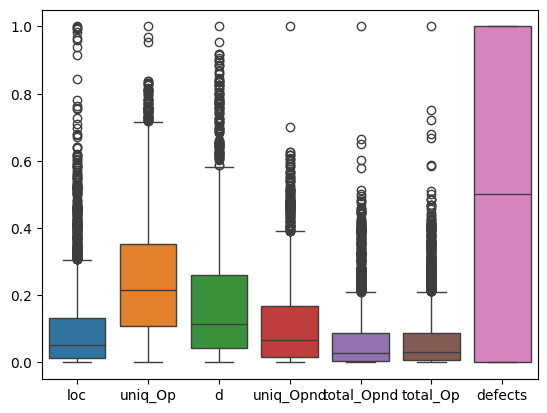

In [ ]:
import seaborn as sns

# Assuming 'generated_df' is your DataFrame
sns.boxplot(data=df_smote)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming df_smote is your resampled DataFrame
# Assuming "defects" is the target column and the rest are features
X = df_smote.drop("defects", axis=1)
y = df_smote["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)


Random Forest Accuracy: 0.9033613445378151
Logistic Regression Accuracy: 0.7254901960784313


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming df_smote is your resampled DataFrame
# Assuming "defects" is the target column and the rest are features
X = df_smote.drop("defects", axis=1)
y = df_smote["defects"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train k-Nearest Neighbors (kNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("k-Nearest Neighbors (kNN) Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Support Vector Machine (SVM) Accuracy: 0.7254901960784313
Gradient Boosting Accuracy: 0.8263305322128851
k-Nearest Neighbors (kNN) Accuracy: 0.834733893557423
Decision Tree Accuracy: 0.84593837535014
Naive Bayes Accuracy: 0.6890756302521008


In [ ]:
X_gan = df_gan.drop("defects", axis=1)
y = df_gan["defects"]

# Apply MinMax scaling to features
scaler = MinMaxScaler()
X = scaler.fit_transform(X_gan)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

# Calculate accuracy scores
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

Random Forest Accuracy: 0.8935574229691877
Logistic Regression Accuracy: 0.8851540616246498


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Train Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Train k-Nearest Neighbors (kNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions
svm_predictions = svm_classifier.predict(X_test)
gb_predictions = gb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("k-Nearest Neighbors (kNN) Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)


Support Vector Machine (SVM) Accuracy: 0.8977591036414566
Gradient Boosting Accuracy: 0.8837535014005602
k-Nearest Neighbors (kNN) Accuracy: 0.9033613445378151
Decision Tree Accuracy: 0.8739495798319328
Naive Bayes Accuracy: 0.834733893557423
